In [48]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def solarWeighting(y):

    if (y > 1) or (y < 0):
        raise ValueError("y must be bewteen 0 and 1")
    
    return 1 - 0.482*(3*y**2 - 1)/2

Investigation 1A

In [22]:
# FUNCTION: GIVEN iceLine, return needed Q, solar flux constant

def solarFluxfromIceLine(iceLine):

    if (iceLine > 1) or (iceLine < 0):
        raise ValueError("iceLine must be bewteen 0 and 1")
    
    
    criticalTemperature = -10 
    outgoingRadiationA = 202
    outgoingRadiationB = 1.9
    transportCoefficient = 1.6*outgoingRadiationB
    albedoWater = 0.32
    albedoIce = 0.62
    albedoBar = lambda iceLine: albedoIce + (albedoWater - albedoIce)*iceLine*(1 - 0.241*(iceLine**2 - 1))
    solarweighting = lambda iceline: 1 - 0.482*(3*iceline**2 - 1)/2
    
    return (criticalTemperature + outgoingRadiationA/outgoingRadiationB)*(outgoingRadiationB+transportCoefficient)/(solarweighting(iceLine)*(1 - (albedoIce+albedoWater)/2) + transportCoefficient/outgoingRadiationB*(1 - albedoBar(iceLine)))

    
    

Suppose we start with an iceline near the north pole at y = 0.9 which requires Q ~ 338

In [29]:
solarFluxfromIceLine(0.9)

338.1356988448338

When decreasing the solar flux, Q, the solution trajectory tends towards a critical tipping point. This value of Q can be found by solving the minimosation problem of our equation for solar flux.

In [30]:
minimize(solarFluxfromIceLine, [0.5], bounds=[(0,1)])

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 325.8339447002967
        x: [ 6.092e-01]
      nit: 3
      jac: [-5.684e-06]
     nfev: 10
     njev: 5
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

This shows the minimum is obtained at iceLine = 0.6 with Q ~ 325. Therefore to achieve the jump to the ice only steady state from the partially iced steady state, Q needs to decrease (338-325) = 13 {insert units}.

To move away from the ice only steady state we need to increase Q up to another critical tipping point doint due to hysteresis preventing us from returning to the original steady state. The ice only state has an upper bound of ~441 {units}. Therefore to start the ice retreating form the equator we need to increase Q by (441-325) = 116 {units}.

Investigation 1B

In [34]:
def Qmin(A,B,Tc,k):
    return ((B+k)*(Tc + A/B))/((1-0.32)*(solarWeighting(1)+k/B))

In [53]:
Qmin(202,1.9,-10,0)

519.532137179196

In [36]:
def Qmax(A,B,Tc,k):
    return ((B+k)*(Tc + A/B))/((1-0.62)*(solarWeighting(0)+k/B))

In [51]:
kArray = np.linspace(0, 20, 100)
kQmaxArray = Qmax(202,1.9,-10,kArray)
kQminArray = Qmin(202,1.9,-10,kArray)
                  

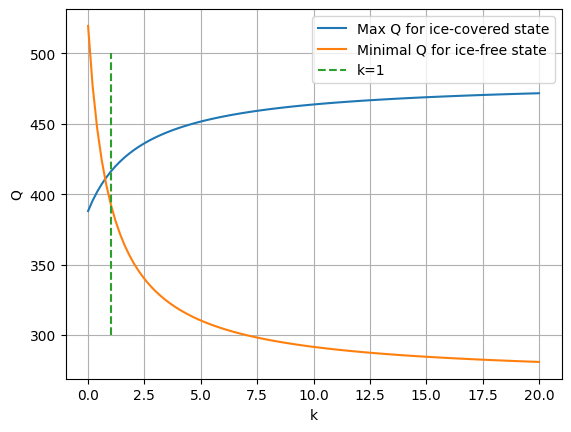

In [66]:
plt.plot(kArray, kQmaxArray,label='Max Q for ice-covered state')
plt.plot(kArray, kQminArray,label='Minimal Q for ice-free state')
plt.plot([1,1],[300,500],"--",label='k=1')
plt.xlabel('k')
plt.ylabel('Q')
plt.grid(1)
plt.legend()


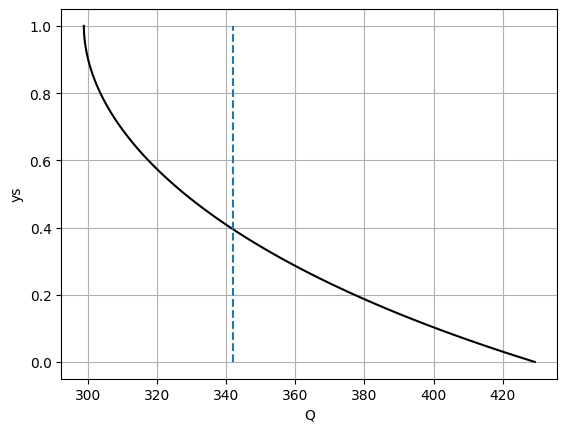

In [64]:
import numpy as np
import matplotlib.pyplot as plt
A = 202 # outgoing radiation
B = 1.9 # outgoing radiation
k = 5*B # transport parameter
s = lambda y: 1 - 0.482*(3*y**2 - 1)/2 # solar weighting
aw = 0.32 # water albedo
ai = 0.62 # ice albedo
Tc = -10.0 # critical temperature for ice formation
Q0 = 342.0 # solar constant (1370 W/m^2 divided by 4)

abar = lambda ys: ai + (aw - ai)*ys*(1 - 0.241*(ys**2 - 1))
Qfunc = lambda ys: (Tc + A/B)*(B+k)/(s(ys)*(1 - (ai+aw)/2) + k/B*(1 - abar(ys)))

# Solve for the ice line
ys = np.linspace(0, 1, 100);
Qs = Qfunc(ys);
plt.plot(Qs, ys, 'k')
plt.plot([Q0, Q0], [0, 1], '--')
plt.xlabel('Q');
plt.ylabel('ys');
plt.grid(1)